<a href="https://www.kaggle.com/code/aleksandrmorozov123/python-mathematical-modeling?scriptVersionId=125296535" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

***This notebook about math modeling***

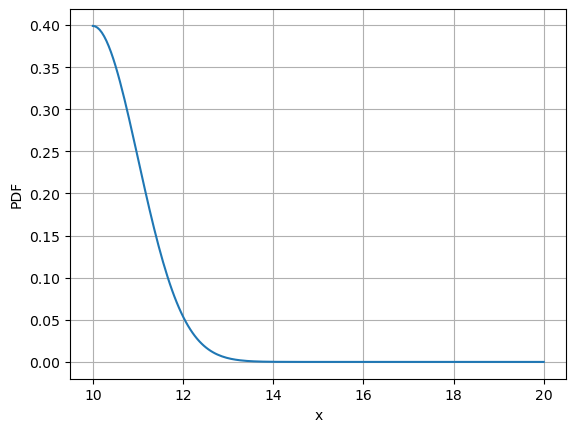

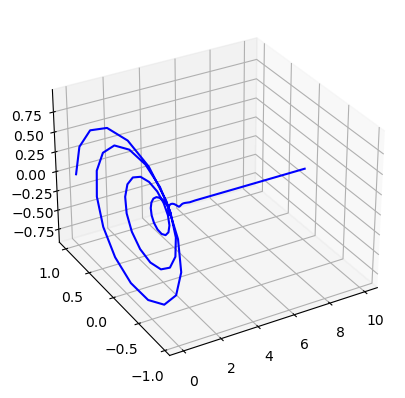

In [2]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from mpl_toolkits import mplot3d

# create the function for probability distributions
def plotNormalPDF_CDF_CHF ():
    mu = 10.0
    sigma = 1.0
    i = complex (0, 1)
    chf = lambda u: np.exp (i * mu * u - sigma * sigma *u * u / 2.0)
    pdf = lambda x: st.norm.pdf (x, mu, sigma)
    cdf = lambda x: st.norm.cdf (x, mu, sigma)
    
    x = np.linspace (10, 20, 200)
    u = np.linspace (0, 10, 250)
    # probability density function
    plt.figure (1)
    plt.plot (x, pdf (x))
    plt.grid ()
    plt.xlabel ('x')
    plt.ylabel ('PDF')
    # cumulative density fucntion
    plt.figure (3)
    ax = plt.axes (projection = '3d')
    chfV = chf (u)
    x = np.real (chfV)
    y = np.imag (chfV)
    ax.plot3D  (u, x, y, 'blue')
    ax.view_init (30, - 120)

plotNormalPDF_CDF_CHF ()


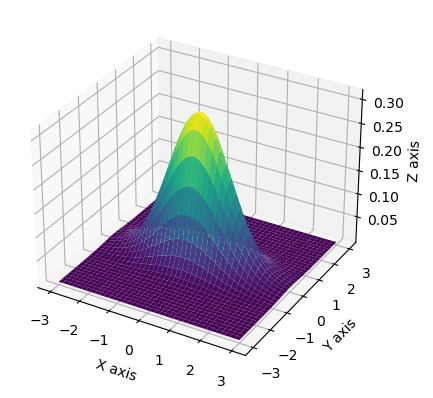

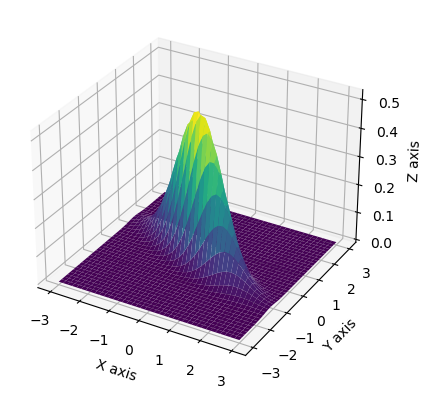

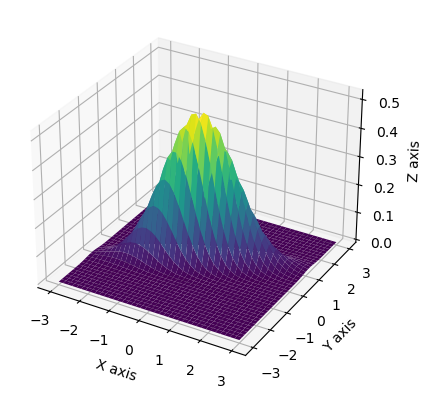

In [3]:
# due bivariate_normal is deleted from package, I add the function
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                 mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    """
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

# create the function for bivariate probaility function
def BivariateNormalPDFPlot ():
    # number of points in each direction
    n = 40;
    
    # denote the parameters
    mu_1 = 0;
    mu_2 = 0;
    sigma_1 = 1;
    sigma_2 = 0.5;
    rho1 = 0.0
    rho2 = - 0.8
    rho3 = 0.8
    
    # create a grid and a mulrivariate normal
    x = np.linspace (-3.0, 3.0, n)
    y = np.linspace (-3.0, 3.0, n)
    X, Y = np.meshgrid (x, y)
    Z = lambda rho: bivariate_normal(X, Y, sigma_1, sigma_2, mu_1, mu_2, rho*sigma_1*sigma_2)

    # make a 3D plot - rho = 0.0
    fig = plt.figure (1)
    ax = fig.add_subplot (projection = '3d')
    ax.plot_surface (X, Y, Z(rho1), cmap = 'viridis', linewidth = 0)
    ax.set_xlabel ('X axis')
    ax.set_ylabel ('Y axis')
    ax.set_zlabel ('Z axis')
    plt.show ()
    
    # make a 3D plot with rho = - 0.8
    fig = plt.figure (2)
    ax = fig.add_subplot (projection = '3d')
    ax.plot_surface (X, Y, Z (rho2), cmap = 'viridis', linewidth = 0)
    ax.set_xlabel ('X axis')
    ax.set_ylabel ('Y axis')
    ax.set_zlabel ('Z axis')
    plt.show ()
    
    # make a 3D plot with rho = 0.8
    fig = plt.figure (3)
    ax = fig.add_subplot (projection = '3d')
    ax.plot_surface (X, Y, Z (rho3), cmap = 'viridis', linewidth = 0)
    ax.set_xlabel ('X axis')
    ax.set_ylabel ('Y axis')
    ax.set_zlabel ('Z axis')
    plt.show ()

BivariateNormalPDFPlot ()
    

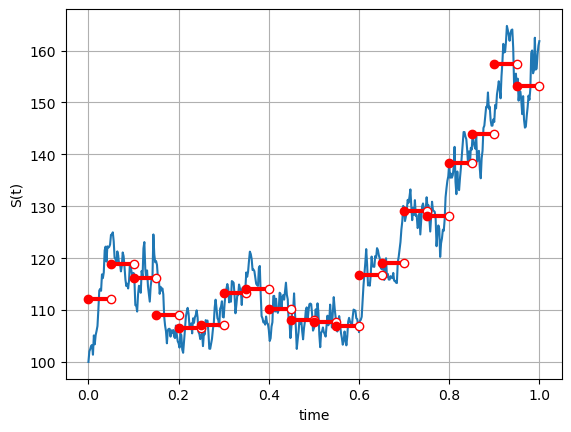

In [4]:
# import required libraries
from scipy.interpolate import interp1d
from scipy import integrate

# create a random step function, approximating a stochastic fucntion g(t) with m = 10
def GeneratePathsGBMABM (NoOfPaths, NoOfSteps, T, r, sigma, S_0):
    Z = np.random.normal (0.0,1.0, [NoOfPaths, NoOfSteps])
    X = np.zeros ([NoOfPaths, NoOfSteps+1])
    time = np.zeros ([NoOfSteps + 1])
    
    X[:,0] = np.log (S_0)
    
    dt = T / float (NoOfSteps)
    for i in range (0, NoOfSteps):
        # making sure that samples from a normal have mean 0 and variance 1
        if NoOfPaths > 1: Z [:, 1] = (Z[:, i] - np.mean (Z[:, i])) / np.std (Z[:, i])
        X [:, i+1] = X [:, i] + (r - 0.5 * sigma * sigma) * dt + sigma * np.power (dt, 0.5) * Z [:, i]
        time [i+1] = time [i] + dt
    # compute exponent of ABM
    S = np.exp (X)
    paths = {'time':time, 'S':S}
    return paths

def mainCalculation ():
    NoOfPaths = 1
    NoOfSteps = 500
    T = 1
    r = 0.05
    sigma = 0.4
    S_0 = 100
    
    Paths = GeneratePathsGBMABM (NoOfPaths, NoOfSteps, T, r, sigma, S_0)
    timeGrid = Paths ['time']
    S = Paths ['S']
    
    plt.figure (1)
    plt.plot (timeGrid, np.transpose (S))
    plt.grid ()
    plt.xlabel ('time')
    plt.ylabel ('S(t)')
    
    m = 20
    pathNumber = 0
    f = interp1d (timeGrid, S [pathNumber, :])
    
    for k in range (1, m*T+1):
        tGrid = np.linspace (float ((k-1))/m, float (k)/m, 100)
        g_m =  m * integrate.trapezoid (np.squeeze (f(tGrid)), np.squeeze (tGrid))
        plt.plot (tGrid, g_m * np.ones ([len (tGrid), 1]), '-r', linewidth = 3.0)
        plt.plot (tGrid [0], g_m, 'or')
        plt.plot (tGrid [-1], g_m, 'or', markerfacecolor = [1, 1, 1])
    
mainCalculation ()

Text(0.5, 1.0, 'Integrated Brownian Motion paths')

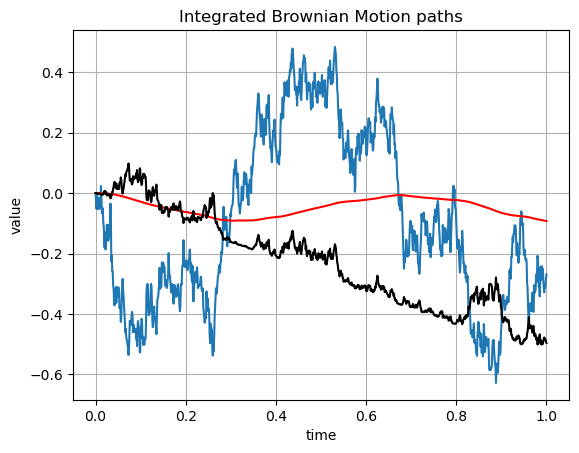

In [5]:
# create function for integrated Brownian motion
def ComputeIntegrals (NoOfPaths, NoOfSteps, T):
    Z = np.random.normal (0.0, 1.0, [NoOfPaths, NoOfSteps])
    W = np.zeros ([NoOfPaths, NoOfSteps+1])
    I1 = np.zeros ([NoOfPaths, NoOfSteps+1])
    I2 = np.zeros ([NoOfPaths, NoOfSteps+1])
    time = np.zeros ([NoOfSteps+1])
    
    dt = T / float (NoOfSteps)
    for i in range (0, NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1: Z[:, i] = (Z[:,i] - np.mean (Z[:, i])) / np.std (Z[:, i])
        W [:, i+1] = W [:, i] + np.power (dt, 0.5)*Z[:, i]
        I1[:, i+1] = I1[:, i] + W [:,i]*dt
        I2[:, i+1] = I2[:, i] + W[:, i]*(W[:,i+1]-W[:, i])
        time [i+1] = time[i] + dt
    paths = {'time':time, 'W':W, "I1":I1, 'I2':I2}
    return paths

NoOfPaths = 1
NoOfSteps = 1000
T = 1

W_t = ComputeIntegrals (NoOfPaths, NoOfSteps, 1)
timeGrid = W_t['time']
Ws = W_t['W']
intWsds = W_t['I1']
intWsdWs = W_t ['I2']

plt.figure (1)
plt.plot (timeGrid, np.transpose (Ws))
plt.plot (timeGrid, np.transpose (intWsds), 'r')
plt.plot (timeGrid, np.transpose (intWsdWs), 'k')
plt.grid ()
plt.xlabel ('time')
plt.ylabel ('value')
plt.title ('Integrated Brownian Motion paths')